## Титаник 

##### Задача: 

Обучить модель определять, кто из пассажиров Титаника выживет после крушения корабля

На выходе необходимо получить список пассажиров с разметкой выживших/не выживших

##### Описание данных

* survival - Survival
* pclass - Ticket class
* sex - Sex
* Age - Age in years
* sibsp - # of siblings / spouses aboard the Titanic
* parch - # of parents / children aboard the Titanic
* ticket - Ticket number
* fare - Passenger fare
* cabin - Cabin number
* embarked - Port of Embarkation

Для начала необходимо установить зависимости

In [123]:
pip install -r requirements.txt

  Using cached numpy-1.23.5-cp38-cp38-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'D:\\DS_IT\\Anaconda\\Lib\\site-packages\\~~mpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



## Импорт модулей

In [181]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Чтение данных

In [182]:
df_train = pd.read_csv('train.csv', index_col=0)
df_test = pd.read_csv('test.csv', index_col=0)

index_col:    
Столбцы, используемые в качестве индекса датафрейма. Задаются либо как имя строки, либо как индекс столбца. Если задана последовательность int/str, используется мультииндекс.

## Для чего нужна предобработка

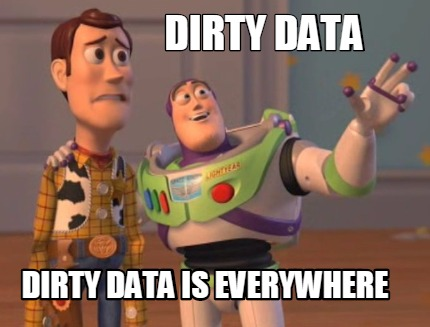

"Чистота" данных означает правильный формат данных, отсутствие в них пропусков, сильных выбросов.

Стоит понимать, что входные данные очень редко бывают «чистыми». Перед тем, как приступать к обучению модели, нужно поработать с данными и хорошенько очистить их. Ведь успешность модели в большей мере зависит именно от тех данных, которые вы скормите алгоритму.

## Анализ и предобработка данных

Что ж, приступим

Для начала посмотрим на размер выборки. Для этого вызовем свойство shape. Оно возвращает кортеж, представляющий размерность датафрейма. Первый элемент показывает количество строк, второй - столбцов

In [183]:
df_train.shape

(891, 11)

Итак, в нашей выборке 891 строка и 11 столбцов. Теперь вызовем метод sample(). Он возвращает случайную выборку элементов таблицы.

Параметр n отвечает за количество возвращаемых элементов. Для воспроизводимости можно задать параметр random_state.

In [184]:
df_train.sample(n=7, random_state=46)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
625,0,3,"Bowen, Mr. David John ""Dai""",male,21.0,0,0,54636,16.1000,NaN,S
698,1,3,"Mullens, Miss. Katherine ""Katie""",female,NaN,0,0,35852,7.7333,NaN,Q
472,0,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S
66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S
174,0,3,"Sivola, Mr. Antti Wilhelm",male,21.0,0,0,STON/O 2. 3101280,7.9250,NaN,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S


Свойство dtypes возвращает тип данных каждого столбца. Если столбец не имеет соответствующего типа данных, можно изменить его с помощью метода astype. Например, если числовой столбец задан строковым типом данных. 

In [185]:
df_train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

Метод describe оценивает столбцы с числовым типом данных (int или float) и возвращает статистические данные, которые дают представление о распределении значений.

Описательная статистика включает в себя те данные, которые суммируют центральную тенденцию, дисперсию и форму распределения набора данных, исключая NaN значения.

In [186]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Для тех, кто не знаком с приведенными выше статистическими показателями, расшифрую их значения:

* Count — количество значений.
* Mean — среднее значение.
* Std — стандартное отклонение значения.
* Min — минимальное значение.
* Max — максимальное значение.
* 25% — первый квартиль, означающий, что 25% значений в столбце ниже этого значения.
* 50% — медиана, означающая, что половина значений в столбце ниже этого значения.
* 75% — третий квартиль, означающий, что 75% значений в столбце ниже этого значения.

Эти показатели помогают понять, как распределены значения в столбце. Они также позволяют увидеть, есть ли в столбце какие-либо выбросы. К примеру, среди пассажиров Титаника есть новорожденные дети и пожилые люди.

Далее посмотрим на количество выживших. Для этого вызовем функцию len, передав в нее датафрейм, отфильтрованный по столбцу Survived. Фильтрацию мы можем осуществить с помощью loc. Он используется для доступа к одной или нескольким строкам и столбцам таблицы. loc работает с названиями столбцов и индексами.

In [187]:
# Количество выживших
len(df_train.loc[df_train['Survived'] == 1])

342

In [188]:
# Количество не выживших
len(df_train.loc[df_train['Survived'] == 0])

549

При очистке данных удаляют дубликаты. Для начала проверим, есть ли повторы в таблице с помощью метода duplicated(). Он возвращает логический ряд, обозначающий повторяющиеся строки. Сумма ряда покажет количество дубликатов в таблице

In [189]:
df_train.duplicated().sum() # повторов нет

0

Посмотрю на пропуски в данных и обработаю их.

Способ их обработки зависит от характеристик данных и задачи. Однако в любом случае первым шагом будет проверка наличия в данных пропущенных значений.

Функция isna проверяет каждую ячейку и возвращает True для ячеек с отсутствующим значением. Необработанный результат функции isna не очень полезен для получения общего представления о данных с учетом пропущенных значений.

Можно использовать функцию isna вместе с sum, чтобы увидеть количество пропущенных значений в каждом столбце.

In [190]:
df_train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Значения в числовых полях можно заменить, например, на средние значения, построить собственный алгоритм для обработки пропусков или воспользоваться значением "из коробки". С помощью такого алгоритма для каждого пропуска рассчитывается собственное значение.

Пропуски наблюдаются в 3 столбцах: Age, Cabin, Embarked. Рассмотрим их внимательнее 

In [191]:
df_train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Логично, что количество кают на корабле ограничено. Тогда можно предположить, что пассажиры из одной и той же каюты выживут или не выживут вместе. Признак может быть значим, но количество пропусков очень уж велико(более 75 процентов). Посмотрю отдельно на заполненные значения   

In [192]:
# Имеет смысл сохранить фичу, так как много выживших
len(df_train[~df_train.Cabin.isnull()].loc[df_train[~df_train.Cabin.isnull()]['Survived'] == 1])

136

In [193]:
# Однако не выживших тоже достаточно много. Принимаю решение дропнуть
len(df_train[~df_train.Cabin.isnull()].loc[df_train[~df_train.Cabin.isnull()]['Survived'] == 0])

68

Теперь рассмотрим признак "билет". В нем нет пропусков, однако вопрос о сохранении фичи стоит ребром. Это категориальная переменная, к тому же уникальных билетов 681. Обработать их будет сложно, поэтому сейчас лучше избавиться от этой переменной. В дальнейшем вы сами можете поэкспериментировать с билетом 

In [194]:
# Билет вряд ли поможет модели

df_train[['Name', 'Survived', 'Ticket']].groupby('Ticket').agg(['count', 'sum'])

Name                                                    Survived  \
            count                                                sum    count   
Ticket                                                                          
110152          3  Cherry, Miss. GladysMaioni, Miss. RobertaRothe...        3   
110413          3  Taussig, Mr. EmilTaussig, Mrs. Emil (Tillie Ma...        3   
110465          2  Porter, Mr. Walter ChamberlainClifford, Mr. Ge...        2   
110564          1          Bjornstrom-Steffansson, Mr. Mauritz Hakan        1   
110813          1   Warren, Mrs. Frank Manley (Anna Sophia Atkinson)        1   
...           ...                                                ...      ...   
W./C. 6608      4  Ford, Mr. William NealFord, Miss. Robina Maggi...        4   
W./C. 6609      1                       Harknett, Miss. Alice Phoebe        1   
W.E.P. 5734     1                        Chaffee, Mr. Herbert Fuller        1   
W/C 14208       1                                 Harris, Mr. Walter        1   
WE/P 5735       2  Crosby, Miss. Harriet RCrosby, Capt. Edward Gi...        2   

                 
            sum  
Ticket           
110152        3  
110413        2  
110465        0  
110564        1  
110813        1  
...          ..  
W./C. 6608    0  
W./C. 6609    0  
W.E.P. 5734   0  
W/C 14208     0  
WE/P 5735     1  

[681 rows x 4 columns]

Столбец с именем пассажира можно удалить, так как каждому пассажиру уже присвоен уникальный индентификатор 

In [195]:
# Удалю ненужное
df_train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [196]:
# Из тестовой выборки тоже
df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

Категориальные переменные лучше перевести в числовые. Классические алгоритмы машинного обучения, не умеют работать с категориальными переменными. Они записаны строками, наша задача закодировать строки числами

Переменная "пол" является категориальной. Для того, чтобы посмотреть, какие категории в ней содержатся, вызовем метод value_counts. Он возвращает ряд, содержащий количество уникальных строк в фрейме данных. Параметром ascending можно регулировать сортировку данных при выводе(True для возрастания, False для убывания)

In [197]:
df_train['Sex'].value_counts(ascending=True)

female    314
male      577
Name: Sex, dtype: int64

Переменная содержит только две категории, значит, можем сделать столбец бинарным. Пусть мужчина обозначается 1, женщина 0

In [198]:
df_train['Sex'] = np.where(df_train['Sex']=='male', 1, 0)

In [199]:
df_test['Sex'] = np.where(df_test['Sex']=='male', 1, 0)

Можно также вывести пропуски как отдельную категорию при помощи value_counts. Используем параметр dropna

In [200]:
df_train['Embarked'].value_counts(ascending=False, dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

Для визуализации используем библиотеку seaborn

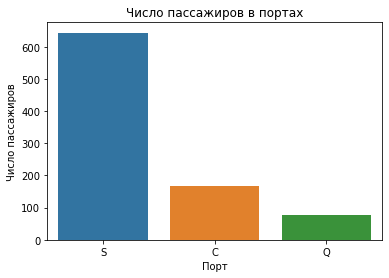

In [201]:
embarked_cat = df_train['Embarked'].value_counts()
sns.barplot(x = embarked_cat.index, y = embarked_cat.values)
plt.title('Число пассажиров в портах')
plt.ylabel('Число пассажиров')
plt.xlabel('Порт');

Обнаружены 2 пропущенных значения, посмотрим на них

In [202]:
df_train[df_train.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
62,1,1,0,38.0,0,0,80.0,NaN
830,1,1,0,62.0,0,0,80.0,NaN


Так как оба пассажира выжили, присвоим им тот порт, который связан с максимальным числом выживших пассажиров 

In [203]:
df_train[['Survived', 'Embarked']].groupby('Embarked').sum('Survived')

,Survived
Embarked,
C,93
Q,30
S,217


Можно визуально найти максимум и интересующий нас порт, но лучше это действие автоматизировать. Используем метод idxmax, который возвращает индекс первого вхождения максимума по строкам или столбцам(регулируем параметром axis)

In [204]:
max_surv_port = df_train[['Survived', 'Embarked']].groupby('Embarked').sum('Survived').idxmax(axis=0)[0]

In [205]:
# Заполняем пропуски
df_train['Embarked'] = np.where(~df_train['Embarked'].isnull(), df_train['Embarked'], max_surv_port)

Теперь пропусков в столбце нет, можно кодировать переменную. Здесь уже три категории, воспользуемся методом get_dummies. Он преобразует категориальную переменную в фиктивные / индикаторные переменные. Этот тип кодирования называют one-hot encoder. Принцип работы заключается в создании бинарных признаков, которые показывают принадлежность к уникальному значению.

In [206]:
# one-hot
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

Вместо столбца Embarked появилось 3 новых столбца с префиксом порта

In [207]:
df_train.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
370,1,1,0,24.0,0,0,69.3,1,0,0


Осталось обработать пропуски в столбце Age. Рассмотрим 2 способа: собственный алгоритм и коробочное решение. Создам копию датафрейма, чтобы использовать ее во втором методе

In [208]:
lr = df_train.copy()

Мы уже узнали, что диапазон возраста довольно широкий. Взять арифметическое среднее кажется совсем уж примитивно и не очень корректно, а замена на 0 - слишком не естественно и явно не корректно.  

Поступим так: заменим на медиану по половому признаку. 

In [209]:
mean_age_female = df_train[df_train.Sex == 0]['Age'].median()
mean_age_male = df_train[df_train.Sex == 1]['Age'].median()

df_train['Age'] = np.where(~df_train['Age'].isnull(), df_train['Age'], 
                           np.where(df_train.Sex == 1, mean_age_male, mean_age_female))

Итак, пропуски в датафрейме обработаны

In [210]:
df_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

Существуют более мощные методы — многомерные. Для заполнения пропусков мы строим отдельную модель машинного обучения, где целевой столбец тот, который мы хотим обработать от пропусков.

Подробнее о методах: https://www.dmitrymakarov.ru/data-analysis/nan-06-2/

Детерминированный подход заключается в заполнениии пропусков значениями, предсказанными линейной регрессией

Преобразуем таблицу с помощью StandardScaler. 

Он позволяет стандартизировать данные, удалив среднее значение и масштабируя дисперсию до единицы.

Стандартная оценка выборки x рассчитывается как:

z = (x - u) / s

где u - среднее значение обучающих выборок или ноль, если with_mean=False, и s - стандартное отклонение обучающей выборки или единица, если with_std=False.

In [211]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
lr = pd.DataFrame(scaler.fit_transform(lr), columns = lr.columns)

Далее создаем копию таблицы, в которой столбец Age заполнен null

In [212]:
# создадим маску из пустых значений в столбце Age с помощью метода .isnull()
test = lr[lr['Age'].isnull()].copy()
test.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
507,1.26699,-1.566107,0.737695,NaN,-0.474545,-0.473674,-0.113846,-0.482043,-0.307562,0.615838


Создаем обучающую выборку, удалив строки с пропусками

In [213]:
train = lr.dropna().copy()

In [214]:
y_train = train['Age'] 
X_train = train.drop('Age', axis = 1)
 
X_test = test.drop('Age', axis = 1)

Обучим модель и сделаем прогноз

In [215]:
from sklearn.linear_model import LinearRegression
 
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [216]:
test['Age'] = y_pred

Соединим обучающую и тестовую выборки

In [217]:
lr = pd.concat([train, test])

Также можно вернуть исходный формат данных, применив метод inverse_transform()

In [218]:
lr = pd.DataFrame(scaler.inverse_transform(lr), columns = lr.columns)
lr.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
399,0.0,3.0,0.0,21.000000,0.0,0.0,7.7500,0.0,1.0,0.0
212,0.0,1.0,1.0,40.000000,0.0,0.0,0.0000,0.0,0.0,1.0
252,1.0,3.0,0.0,26.000000,0.0,0.0,7.8542,0.0,0.0,1.0
686,1.0,3.0,0.0,24.000000,0.0,3.0,19.2583,1.0,0.0,0.0
855,0.0,2.0,1.0,37.389848,0.0,0.0,0.0000,0.0,0.0,1.0


Посмотрим на распределение возраста с заполнением пропусков разными методами

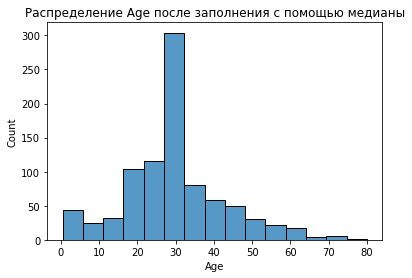

In [219]:
sns.histplot(df_train['Age'], bins = 15)
plt.title('Распределение Age после заполнения с помощью медианы')
plt.show()

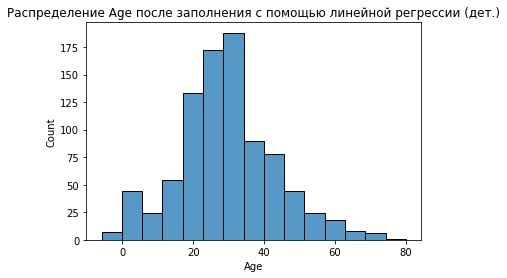

In [220]:
sns.histplot(lr['Age'], bins = 15)
plt.title('Распределение Age после заполнения с помощью линейной регрессии (дет.)')
plt.show()

Более мощный метод дал лучший результат, распределение больше похоже на нормальное

Теперь давайте разобьем данные на признаки и целевую переменную

In [221]:
# Признаки и таргет
train_data = df_train.drop('Survived', 1)
train_labels = df_train['Survived']

test_data = df_test
test_labels = pd.read_csv('gender_submission.csv', index_col=0)

<ipython-input-221-f31c8be2d56b>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_data = df_train.drop('Survived', 1)


Посмотрим на соотношение классов в трейне

In [222]:
print('df_train = 1: {:.2f} \ndf_train = 0: {:.2f}'.format(sum(train_labels)/float(len(train_labels)), 
                                                        1.0 - sum(train_labels)/float(len(train_labels))))

df_train = 1: 0.38 
df_train = 0: 0.62


Теперь посмотрим на баланс соотношения данных в трейновой и тестовой выборках. Визуально баланс выдержан

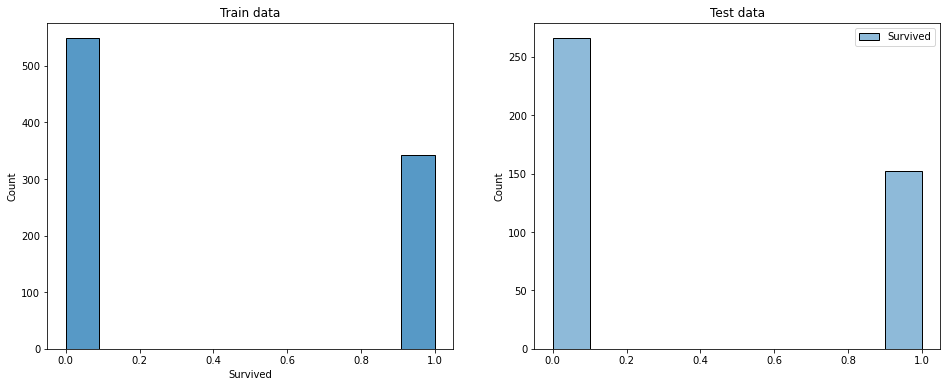

In [223]:
pylab.figure(figsize = (16, 6))

pylab.subplot(1,2,1)
sns.histplot(train_labels)
pylab.title('Train data')

pylab.subplot(1,2,2)
sns.histplot(test_labels)
pylab.title('Test data')
plt.show()

Исключим возможность появления мультиколлинеарности. 

Мультиколлинеарность - тесная корреляционная взаимосвязь между отбираемыми для анализа факторами, совместно воздействующими на общий результат, которая затрудняет оценивание регрессионных параметров.

При наличии мультииколлинеарности матрица 𝑋𝑇𝑋 является вырожденной
(обратная матрица не существует) =>
* Оценки МНК имеют большую вариацию и являются ненадежными
* Интерпретация параметров затрудняется, они теряют смысл.

In [224]:
def correlated_features(data, stop=0.75):
    correlation_matrix = data.corr()
    correlated_features = set() 
    for i in range(len(correlation_matrix.columns)):
        cor_pares=[]
        for j in range(i): 
            if abs(correlation_matrix.iloc[i, j]) > stop:
                cor_pares = (correlation_matrix.columns[i], correlation_matrix.index[j], abs(correlation_matrix.iloc[i, j]))
                correlated_features.add(cor_pares)
    return correlated_features

In [225]:
def drop_cor_features(data, correlated_features):
    for features in correlated_features:
        try:
            data.drop(features[0], axis=1, inplace=True)
        except:
            continue

In [226]:
corr_features = correlated_features(train_data,  stop=0.5)

In [227]:
drop_cor_features(train_data, corr_features) 
drop_cor_features(test_data, corr_features) #Из теста также удаляем, чтобы избежать ошибки размерности

In [228]:
train_data.shape

(891, 7)

In [229]:
test_data.shape

(418, 7)

In [230]:
len(correlated_features(train_data)) == 0

True

Дальше - выбросы, их удаление позволит чувствительным к ним алгоритмам показать лучший результат

In [231]:
df_train = train_data 

df_train['Survived'] = train_labels

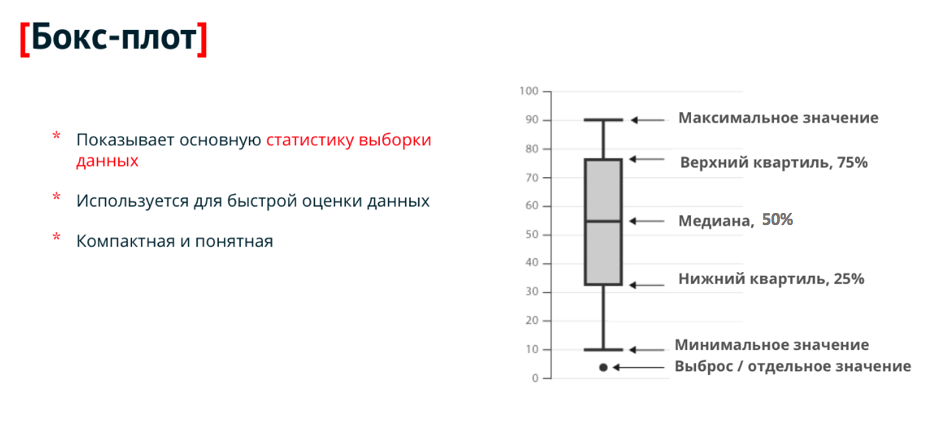

<AxesSubplot:>

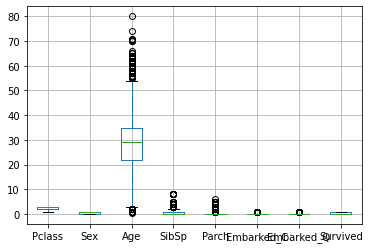

In [232]:
df_train.boxplot()

Для оценки выбросов попробую использовать Z-score

1.   Z-score - это статистическая мера, которая показывает, насколько каждая точка удалена (в std) от среднего значения



In [279]:
z = np.abs(stats.zscore(df_train.drop('Survived', 1)))
threshold = 2.1
train_data_z = df_train[(z < threshold).all(axis=1)]

<ipython-input-279-f5b845a8bcfd>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  z = np.abs(stats.zscore(df_train.drop('Survived', 1)))


In [280]:
train_data_z.shape

(710, 8)

Проверим наличие выбросов после применения метода

<ipython-input-281-da5e0c9dac21>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_data_z.drop('Survived', 1).boxplot()


<AxesSubplot:>

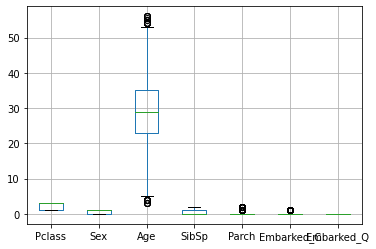

In [281]:
train_data_z.drop('Survived', 1).boxplot() 

In [282]:
df_train = train_data_z

In [283]:
train_data = df_train.drop('Survived', 1)
train_labels = df_train['Survived']

<ipython-input-283-c477f5d40d24>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_data = df_train.drop('Survived', 1)


Мы научились обрабатывать данные для модели, в следующий раз обучим нашу первую модель